## Email Spam Classifier 

* This dataset is a part of [CALO PROJECT](https://www.cs.cmu.edu/~./enron/).


* It contains data from about 150 users, mostly senior management of Enron, organized into folders. The corpus contains a total of about 0.5M messages.


* However for sole purpose of this project we are only using a chunk of the original dataset with labelled data.


* The goal is to create a machine learning classifier that correctly classify whether an email is spam or ham.

In [9]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('email_train.csv')
train_df.head()

,email,class
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


#### We have made 2 dataset first one is train_df for training and crossvalidtion and test_df as unseen data for testing.

In [10]:
test_df = pd.read_csv('email_test.csv')
test_df.head()

,Text,Class
0,Subject: you need the capsule that will increa...,spam
1,Subject: correspondence assistant / manager he...,spam
2,Subject: c ; ia _ lis s _ o : ftab ' s place ...,spam
3,Subject: new alternative remedy may help fight...,spam
4,Subject: the permanent solution to penis grow...,spam


### Dataset Specification

* **Train Dataset**

In [11]:
# The dataset has almost 20k rows with 2 columns.
train_df.shape

(19998, 2)

In [12]:
# the distribution of emails in train dataset
train_df['class'].value_counts()

spam    11224
ham      8774
Name: class, dtype: int64

In [13]:
spam_percent = (len(train_df[train_df['class'] == 'spam'])/len(train_df))*100
ham_percent = (len(train_df[train_df['class']=='ham'])/len(train_df))*100
print("The train dataset has {0:.2f}% spam and {1:.2f}% of ham.".format(spam_percent,ham_percent))

The train dataset has 56.13% spam and 43.87% of ham.


* **Test Dataset**

In [14]:
test_df.shape

(1141, 2)

In [15]:
# the distribution of emails in test dataset
test_df['Class'].value_counts()

ham     767
spam    374
Name: Class, dtype: int64

In [16]:
spam_percent = (len(test_df[test_df['Class'] == 'spam'])/len(test_df))*100
ham_percent = (len(test_df[test_df['Class']=='ham'])/len(test_df))*100
print("The test dataset has {0:.2f}% spam and {1:.2f}% of ham.".format(spam_percent,ham_percent))

The test dataset has 32.78% spam and 67.22% of ham.


* **The Emails Itself**

In [17]:
train_df.email[0]

"Subject: what up , , your cam babe what are you looking for ? if your looking for a companion for friendship , love , a date , or just good ole ' fashioned * * * * * * , then try our brand new site ; it was developed and created to help anyone find what they ' re looking for . a quick bio form and you ' re on the road to satisfaction in every sense of the word . . . . no matter what that may be ! try it out and youll be amazed . have a terrific time this evening copy and pa ste the add . ress you see on the line below into your browser to come to the site . http : / / www . meganbang . biz / bld / acc / no more plz http : / / www . naturalgolden . com / retract / counterattack aitken step preemptive shoehorn scaup . electrocardiograph movie honeycomb . monster war brandywine pietism byrne catatonia . encomia lookup intervenor skeleton turn catfish . "

### Preprocessing Dataset

In [18]:
# First let's change the column names similar in both the datasets
train_df.rename(columns={'class': 'label'}, inplace=True)
test_df.rename(columns={'Class': 'label'}, inplace=True)
test_df.rename(columns={'Text': 'email'}, inplace=True)

In [19]:
import re
def removing_special_characters(sentence):
    b = []
    for i in sentence.split(' '):
        if re.match('^[a-zA-Z]+',i):
            b.append(i)
    str1 = ' '.join(b)
    return str1

In [20]:
#removing the special characters from the emails.
train_df['email'] = train_df['email'].map(lambda x: removing_special_characters(x))
test_df['email'] = test_df['email'].map(lambda x: removing_special_characters(x))

In [21]:
#removing the "Subject:" from the emails;
train_df['email'] = train_df['email'].map(lambda x: x.lstrip('Subject:'))
test_df['email'] = test_df['email'].map(lambda x: x.lstrip('Subject:'))
#placing labels of 1 for spam and 0 for ham
train_df['labels'] = train_df['label'].map(lambda x : 1 if x=='spam' else 0)
test_df['labels'] = test_df['label'].map(lambda x : 1 if x=='spam' else 0)
#droping the label columns
train_df.drop('label', axis=1, inplace=True)
test_df.drop('label', axis=1, inplace=True)    

In [22]:
# email after preprocessing 
train_df.email[0]

' what up your cam babe what are you looking for if your looking for a companion for friendship love a date or just good ole fashioned then try our brand new site it was developed and created to help anyone find what they re looking for a quick bio form and you re on the road to satisfaction in every sense of the word no matter what that may be try it out and youll be amazed have a terrific time this evening copy and pa ste the add ress you see on the line below into your browser to come to the site http www meganbang biz bld acc no more plz http www naturalgolden com retract counterattack aitken step preemptive shoehorn scaup electrocardiograph movie honeycomb monster war brandywine pietism byrne catatonia encomia lookup intervenor skeleton turn catfish'

### WordCloud For Spam and Ham

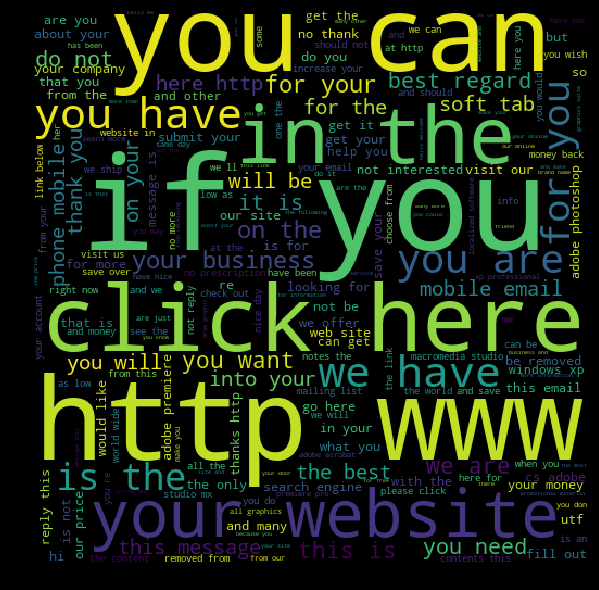

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
spam_words = " ".join(list(train_df[train_df['labels']==1]['email']))
spam_wc =WordCloud(stopwords = {'to', 'of' , 'a' , 'aa'},width = 512,height= 512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

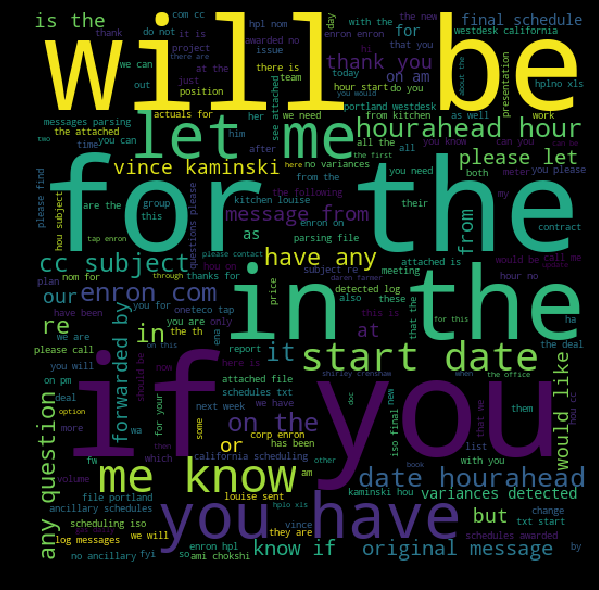

In [28]:
ham_words = " ".join(list(train_df[train_df['labels']==0]['email']))
ham_wc =WordCloud(stopwords = {'to', 'of' , 'ect', 'a', 'aa' , 'and'} ,width = 512,height= 512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### We realized that all the labels of spams and hams are stacked together .

In [38]:
train_df[train_df['labels']==0].index

Int64Index([ 1053,  1054,  1055,  1056,  1057,  1058,  1059,  1060,  1061,
             1062,
            ...
            17385, 17386, 17387, 17388, 17389, 17390, 17391, 17392, 17393,
            17394],
           dtype='int64', length=8774)

In [39]:
train_df[train_df['labels']==1].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19988, 19989, 19990, 19991, 19992, 19993, 19994, 19995, 19996,
            19997],
           dtype='int64', length=11224)

#### We need to shuffle the dataset for this we use  'sklearn.utils.shuffle'

In [40]:
from sklearn.utils import shuffle

In [41]:
def shuffling_dataset(df):
    return shuffle(df)

In [42]:
train_df = shuffling_dataset(train_df)
train_df.reset_index(drop = True , inplace = True)

In [43]:
test_df = shuffling_dataset(test_df)
test_df.reset_index(drop = True , inplace = True)

In [46]:
train_df[:10]

,email,labels
0,discounted prescription drugs online need vic...,1
1,hershey s vs ghirardelli which chocolate do y...,1
2,the delivery of the equipment you ordered is ...,0
3,re uk portfolios and books setup in risktrac ...,0
4,doorstep rac direction met today w causey and...,0
5,next generation ppv device next generation pp...,1
6,fda approved we are one of the top sites on t...,1
7,new invoice for energy and weather vince plea...,0
8,manage your diabetes effortlessly with diabet...,1
9,updated q as for enron employees updated ques...,0


### Spliting the dataset using train-test-split

In [48]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df['email'], 
                                                    train_df['labels'], 
                                                    random_state=0)

In [49]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

  re further follow up i have asked shelly jones to send me a complete list of the analysts from ou that will start in july i ll will contact her again today if she doesn t get back with me i think it would be a great idea to invite ted his e mail is tjacobs ou edu it might also be a good idea to invite george hope i will also ask shelly if they have assigned a recruiter to ou yet this would be a great opportunity for the individual to meet with the potential recruiting team p s if i am thinking too much and the list is growing larger than what you had anticipated let me know


X_train shape:  (14998,)


### Vectorizing the feature

* Before training our model we need to preprocess certain features from our dataset. One of them being the ''uppercase-lowercase'' issue, frequency count of words in a spam or ham, and the distribution of important words ignoring words like "the" , "a" ,"an" etc.



* For that we use an approach known as **bag of word** approach. The bag of words approach is commonly used way to represent text for use in machine learning which ignores structures and only counts how often each word occurs . It allows us to use bags of words approach by converting a collections of text document into matrix of token count.



* Sklearn has a method known as **CountVectorisor**. Fitting the count vectorisor consist of the tokenisation of the trained data and building of the vocabulary. It fits by finding all sequnces of characters of atleast two letters or numbers separated by word boundaries.Convert everything to lowercase and builds a vocabulary using these tokens. 


* The result of CountVectorisor is a **high dimensional sparse matrix** containing count of each word in the dataset stored in a  compressed row format.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [51]:
vect.get_feature_names()[::1000]

['aa',
 'afflicted',
 'ammeter',
 'archdioceseshmuel',
 'availabilities',
 'becloudherdsman',
 'ble',
 'brittany',
 'cannibals',
 'chaneys',
 'clenches',
 'computadores',
 'corrodedelirious',
 'cyberage',
 'demigodimmobility',
 'disarrange',
 'dripping',
 'ekj',
 'equipment',
 'exxon',
 'fixefad',
 'fsj',
 'giris',
 'gujarantee',
 'heritage',
 'humour',
 'incompliance',
 'inversion',
 'josie',
 'kristina',
 'lhe',
 'lrqvqk',
 'masque',
 'miceproletariat',
 'motley',
 'nero',
 'oak',
 'organisation',
 'passages',
 'phonal',
 'portugese',
 'promo',
 'quothang',
 'regular',
 'riddel',
 'sailor',
 'selma',
 'silt',
 'sowohl',
 'strategic',
 'szablya',
 'thi',
 'transfuse',
 'und',
 'vdaerpa',
 'wachiya',
 'winter',
 'yazilimlari']

In [52]:
len(vect.get_feature_names())

57754

In [53]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<14998x57754 sparse matrix of type '<class 'numpy.int64'>'
	with 739659 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import roc_auc_score
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9834175772996927


In [56]:
from sklearn.metrics import classification_report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))
    


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      2173
          1       0.98      0.99      0.99      2827

avg / total       0.98      0.98      0.98      5000



In [70]:
print(model.predict(vect.transform(["Sir you have a meeting tomorrow ",
                                    'limited seats available,Apply quickly to avail the offer'])))

[0 1]


#### Accuracy Score for unseen dataset

In [72]:
unseen_predictions = model.predict(vect.transform(test_df['email']))
print('AUC: ', roc_auc_score(test_df['labels'], unseen_predictions))

AUC:  0.9530307678363512


In [73]:
print(classification_report(test_df['labels'], unseen_predictions))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95       767
          1       0.84      1.00      0.91       374

avg / total       0.95      0.94      0.94      1141



In [80]:
print(model.predict(vect.transform(["Send me those files you told yesterday",
                                    'Sir you have won 1milion dollor'])))

[0 1]


### Features that led to high prediction

In [75]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['enron' 'vince' 'louise' 'attached' 'thanks' 'congratulations' 'doc'
 'meeting' 'hotmail' 'dave']

Largest Coefs: 
['software' 'remove' 'online' 'mobile' 'hello' 'viagra' 'http' 'click'
 'found' 'sex']


### Putting some more context in our model's predictions

#### Using TF-IDF

* The term frequency inverse document frequency allows us to weight terms based on how important they are to the document.


* High weight is given to terms that appear often in a particular document but doesn't appear often in the corpus. Features with low TF-IDF are either commonly used across all document or rarely used and only in long document.

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

10677

In [77]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9809740925996134


In [78]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      2173
          1       0.97      1.00      0.99      2827

avg / total       0.98      0.98      0.98      5000



In [83]:
print(model.predict(vect.transform(["Send me those files you told yesterday",
                                    'Sir you have won 1milion dollor'])))

[0 1]


In [84]:
unseen_predictions = model.predict(vect.transform(test_df['email']))
print('AUC: ', roc_auc_score(test_df['labels'], unseen_predictions))

AUC:  0.9452080820475636


In [86]:
print(classification_report(test_df['labels'], unseen_predictions))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94       767
          1       0.82      1.00      0.90       374

avg / total       0.94      0.93      0.93      1141



In [87]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['painter' 'framemaker' 'xara' 'golive' 'buiider' 'cooi' 'paqemaker'
 'publishinq' 'ulead' 'uiead']

Largest tfidf: 
['love' 'fax' 'dz' 'anderson' 'fyi' 'ecclesiastic' 'note' 'want' 're'
 'spam']


In [88]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['enron' 'vince' 'thanks' 'attached' 'louise' 'the' 'will' 'gas' 'pm'
 'please']

Largest Coefs: 
['your' 'http' 'here' 'software' 'you' 'online' 'click' 'no' 'more' 'our']


### CountVectoriser with N-grams

* It adds sequences of word features known as bigrams , which count pair of adjacent words could be given as features like working versus not working . A trigrams which gives us triplets of adjacent words .

In [89]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

35841

In [90]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9846916957332904


In [91]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      2173
          1       0.98      0.99      0.99      2827

avg / total       0.99      0.99      0.99      5000



In [92]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['enron' 'vince' 'louise' 'attached' 'thanks' 'doc' 'congratulations'
 'pictures' 'fyi' 'promotion']

Largest Coefs: 
['software' 'remove' 'online' 'your' 'http' 'hello' 'goodbye'
 'mobile email' 'phone mobile' 'viagra']


In [93]:
unseen_predictions = model.predict(vect.transform(test_df['email']))
print('AUC: ', roc_auc_score(test_df['labels'], unseen_predictions))

AUC:  0.955638329765947


In [94]:
print(classification_report(test_df['labels'], unseen_predictions))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95       767
          1       0.85      1.00      0.92       374

avg / total       0.95      0.94      0.94      1141



In [95]:
print(model.predict(vect.transform(['Hi All,As a part of Campus 2019, we are making our muAPT registration process simpler and faster!Regarding the same, we need all the students who have an interest in applying for Mu Sigma to update their LinkedIn profile as we will be routing the registrations through the same.Please ensure all the students update their e-mail id on LinkedIn as all subsequent communication regarding the Selection process will be done through that.Regards,',
                                    'Dear Saheel Ahmed,Congratulations! You have qualified for Round 2 of the HackWithInfy contest. With this achievement you are now a step closer to the Grand Finale where you can win cash prizes worth INR 350,000 and a pre-placement interview at Infosys.It gives us immense pleasure to share that you are one of the few who have made this mark to be among the top 5000 programmers to qualify for Round 2 of #HackWithInfy. Now the competition will only get tougher and it is time for you to prepare well.Top 100 finalists who clear Round 2 will get an opportunity to compete in the Grand Finale, at Infosys Pune and win a pre-placement interview (PPI) for the Power Programmer role. The next top 500 finalists will get a PPI for the Systems Engineer role.'])))

[0 0]


In [108]:
print(model.predict(vect.transform(["Congratulations you are appointed as the new intern",
                                    'Sir you have won 1milion dollor'])))

[0 1]


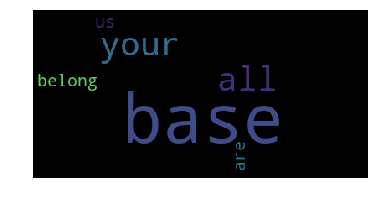

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = 'all your base are belong to us all of your base base base'

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(text)